# Probability Theory

In this notebook we are going to learn how to work with concepts in probability theory in `python`. We will learn how to generate random numbers, plot the distribution of outcomes, and calculate expectation values. 

## `random` library
This library is a part of `numpy` that provides some useful functions that can generate random numbers from different distribution functions such as uniform, integer generators such as coin flip, binomial distribution and etc. 

## simulate coin flip


In [2]:
# import numpy library
import numpy as np

# import pyplot library 
import matplotlib.pyplot as plt

# generate a random number between 0 and 1
np.random.randint(0, 5)

4

The function `randint` generates a random integer in the range $[0, 2)$ that is `0` or `1`. We can assign each integer to a specific outcome of a random event such as a coin flip. In that case we can define `0` to represent *head* and `1` to represent *tail*. 

## generate multiple coin flips 

If one were to flip a coin `n` times then the outcome could be represented by an array of `0`'s and `1`'s with size `n`. You can determine the size of the output array by setting the `size=` argument inside the `randint` function.


In [24]:
np.random.randint(0, 2, size=10)

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0])

(array([491.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 509.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

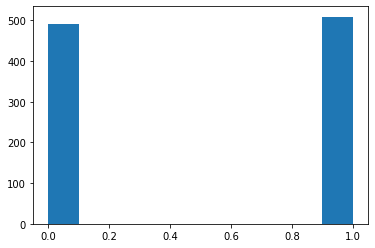

In [59]:
# 1000 coin flips
A = np.random.randint(0, 2, size=1000)

# make figure
fig = plt.figure()

# get the axes
ax = plt.axes()

# plot a histogram of the outcomes 
plt.hist(A)

## Example: The game is to guess how many pairs of people on average have the same birthday in a party of size N. 


[  10  110  210  310  410  510  610  710  810  910 1010 1110 1210 1310
 1410 1510 1610 1710 1810 1910]
[   0   14   73  135  193  335  543  697  875 1118 1451 1654 1967 2388
 2705 3113 3653 3958 4549 4954]


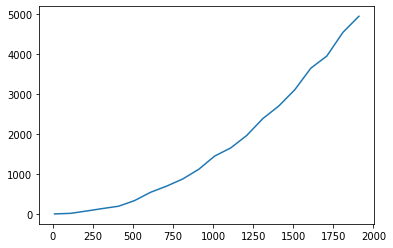

In [36]:
# calculate how many people share the same birthday 
    
def calculate_matches(n):
    outcome = np.random.randint(1, 366, size=n)
    number_of_matches = 0
    for i in range(n):
        for j in range(i+1, n):
            if outcome[i] == outcome[j]:
                number_of_matches += 1
    return number_of_matches
            
party_size = np.arange(10, 2000, 100)
matches = np.zeros_like(party_size)

# calculate for all different party sizes 
for i in range(len(party_size)):
    matches[i] = calculate_matches(party_size[i])
    
print(party_size)
print(matches)

plt.plot(party_size, matches)

# plot that number vs N 

[Histogram](https://en.wikipedia.org/wiki/Histogram) (`hist`) is a plot that represents the **frequency** of a random variable which in our case is the outcome of 1000 coin flips. This specific kind of plot is also called a **distribution** function since it shows how the outcomes of a random event (coin flip) are **distributed** among the possible outcomes. As seen from the histogram the outcome multiple coin flips is not always equal numbers of `0`'s and `1`'s.

## biased coin

If our coin is biased, meaning that we get `0` with some probability $p$ (which is not necessarily $0.5$) and we get `1` with probability $1 - p$, then we can simulate it using the function `choice`. 

In [1]:
# a coin flip with p = 0.8 
np.random.choice([0, 1], p=[0.8, 0.2])

NameError: name 'np' is not defined

If you run this command many times you can see that most of the times we get `0`'s and less frequently we get `1`'s. For generating multiple coin flips we can use the `size=` argument again. 

(array([802.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 198.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

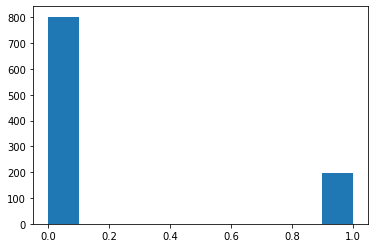

In [67]:
# 1000 biased coin flips with p = 0.8
B = np.random.choice([0, 1], size=1000, p=[0.8, 0.2])

plt.hist(B)

As seen from the plot the coin is not fair anymore and heads are more frequent than tails. 

## Binomial distribution

[Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) describes the number of success events ($k$ heads) that one gets out of multiple Bernouli trials ($n$ coin flips or die rolls). As we saw in the lectures the formula representing the probabilities in the binomial distribution is as follows 
$$
P(Z = k) = {n\choose k} p^{k}(1-p)^{(n-k)}
$$
where $Z$ is our random variable denoting the number of success events. 

In [74]:
# 10 coin flips each with success probability p = 0.5
# the output is the number of heads out of 10 total coin flips 
np.random.binomial(10, 0.5)

5

In [81]:
# we can run the whole binomial experiment for multiple times using the "size" argument
# this means that if we flip 10 coins for 5 different iterations 
# the output would be the number of heads in each iteration
np.random.binomial(10, 0.5, size=5)

array([6, 4, 7, 4, 4])

(array([ 1.,  2.,  9.,  0., 22., 24.,  0., 27., 10.,  5.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

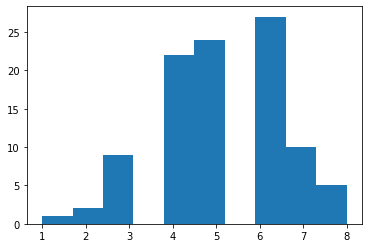

In [95]:
# change the number of iterations (size), what do you observe as you increase the size? 
C = np.random.binomial(10, 0.5, size=100)

plt.hist(C)

## Exercise: Law of large numbers

In this exercise we are trying to understand what happens when we run a random trial (such as rolling a die) for a large number of times. 

1. use a function from `random` library to simulate a roll of an even die (with equal probabilities for 1,2,3,4,5, and 6). 

2. run the function for $n$ times and calculate the average of the numbers you get from those $n$ rolls of the die. 

3. repeat the previous step for different values of $n$ and store the average in an array (for example `avg_array`). 

4. plot the `avg_array` versus $n$. 

5. plot the theoretical expectation value of rolling a die. 

6. what do you observe? 

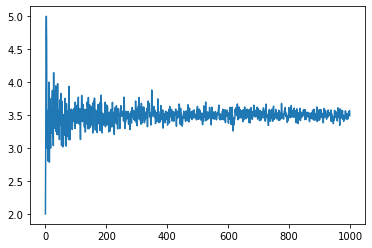

In [18]:
max_trials = 1000
num_trials = np.arange(max_trials)
avg_array = np.zeros_like(num_trials, dtype=np.double)

for i in range(max_trials):
    random_event = np.array(np.random.choice([1, 2, 3, 4, 5, 6], size=i+1))
    avg_array[i] = np.average(random_event)

plt.plot(num_trials, avg_array)